# Hypertensive modeling, with downsampling

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import warnings
import sklearn
import pickle

from scipy.stats import uniform, loguniform

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
 

from IPython.display import display
from IPython.display import HTML
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute._base import SimpleImputer as Imputer 
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
   
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

## We will try out several models, maximizing the f1 score

In [2]:
score_obj = 'f1'

#### Import training and validation data

In [3]:
with open("df_train_ht.pkl","rb") as fh:
    df_train = pickle.load(fh)
with open("df_validation_ht.pkl","rb") as fh:
    df_validation = pickle.load(fh)

#### Downsample to balance the training set.

In [4]:
df_train_p = df_train[(df_train['Hypertensive'] == 1)]
df_train_n = df_train[(df_train['Hypertensive'] == 0)] 

samples = min(df_train_p.shape[0],df_train_n.shape[0])

df_train_p_dnsampled = resample(df_train_p, replace=False, n_samples=samples)
df_train_n_dnsampled = resample(df_train_n, replace=False, n_samples=samples) 

df_train = pd.concat([df_train_n_dnsampled,df_train_p_dnsampled])

#### Separate predictors and response variable.

In [5]:
X_train = df_train.drop(['Hypertensive'], axis = 1)
y_train = df_train['Hypertensive']
  
X_valid = df_validation.drop(['Hypertensive'], axis = 1)
y_valid = df_validation['Hypertensive']

### Features for the model:

In [6]:

print('The features for our hypertension model are as follows:\n')
print(', '.join(X_train.columns))
print('\nThe dimensions of the hypertension training set are ', X_train.shape)
print('\nThe dimensions of the hypertension validation set are ', X_valid.shape)

The features for our hypertension model are as follows:

Age, Gender, Education, Ethnicity, HyperHist, ChestPain, Shortness, Milk, FeltDown, Suicidality, FeltBad, WeakKidneys, UrineLeak, HoursWorked, Dental, Pesticides, PregnantEver, HoursSlept, Smoke100, SmokeNow, MaxWeight, LegLen, ArmCirc, Weight, BMI, Waist, ArmLen, Pulse, FoodFastHours, HHIncome, MealsOut, ReadytoEat, Frozen, KidneyStones, ModWork, VigRec, VigWork, ModRec, WalkBike, DiabHistAge

The dimensions of the hypertension training set are  (14502, 40)

The dimensions of the hypertension validation set are  (2475, 40)


### Parameter search for several models



Decision Tree Classifier Train Set Report
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      7251
           1       0.61      0.86      0.71      7251

    accuracy                           0.65     14502
   macro avg       0.68      0.65      0.63     14502
weighted avg       0.68      0.65      0.63     14502

Decision Tree Classifier Validation Set Report
              precision    recall  f1-score   support

           0       0.81      0.42      0.55      1541
           1       0.46      0.84      0.60       934

    accuracy                           0.57      2475
   macro avg       0.64      0.63      0.57      2475
weighted avg       0.68      0.57      0.57      2475



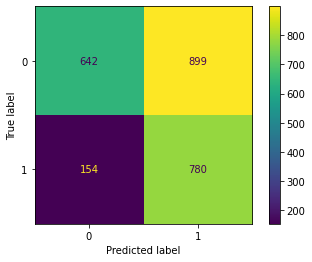

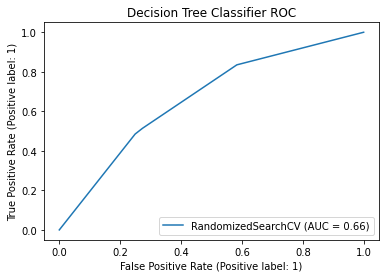

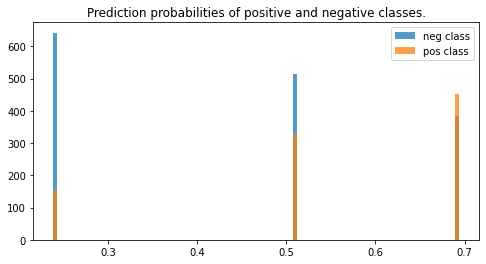







Random Forest Classifier Train Set Report
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      7251
           1       0.76      0.86      0.81      7251

    accuracy                           0.79     14502
   macro avg       0.80      0.79      0.79     14502
weighted avg       0.80      0.79      0.79     14502

Random Forest Classifier Validation Set Report
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1541
           1       0.53      0.75      0.62       934

    accuracy                           0.65      2475
   macro avg       0.66      0.67      0.65      2475
weighted avg       0.69      0.65      0.66      2475



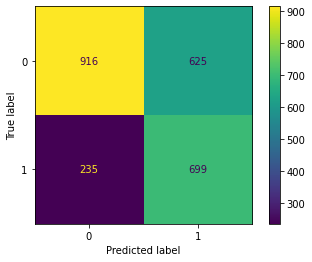

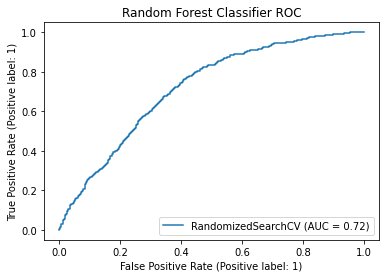

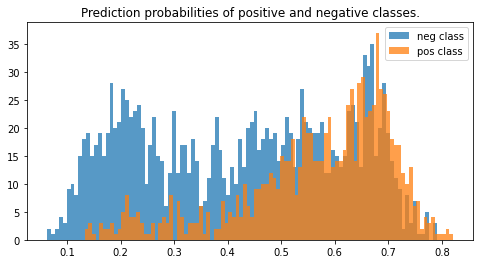







Gradient Boosting Classifier Train Set Report
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      7251
           1       0.69      0.78      0.73      7251

    accuracy                           0.71     14502
   macro avg       0.71      0.71      0.71     14502
weighted avg       0.71      0.71      0.71     14502

Gradient Boosting Classifier Validation Set Report
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1541
           1       0.53      0.73      0.61       934

    accuracy                           0.65      2475
   macro avg       0.66      0.67      0.65      2475
weighted avg       0.69      0.65      0.66      2475



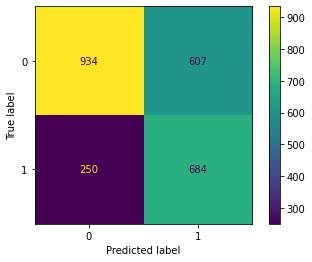

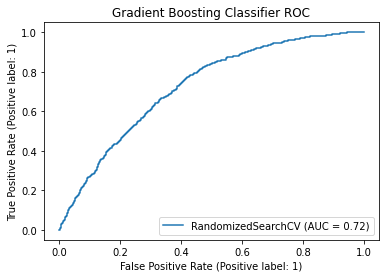

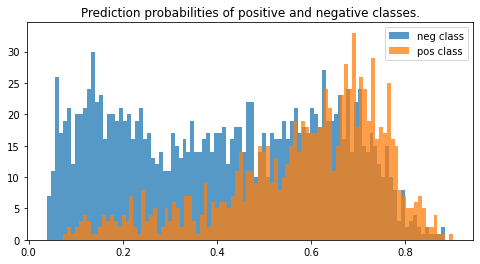







Logistic Regression Train Set Report
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      7251
           1       0.68      0.69      0.68      7251

    accuracy                           0.68     14502
   macro avg       0.68      0.68      0.68     14502
weighted avg       0.68      0.68      0.68     14502

Logistic Regression Validation Set Report
              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1541
           1       0.53      0.65      0.59       934

    accuracy                           0.65      2475
   macro avg       0.65      0.65      0.65      2475
weighted avg       0.67      0.65      0.66      2475



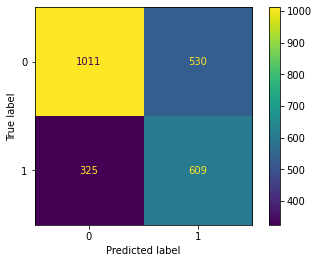

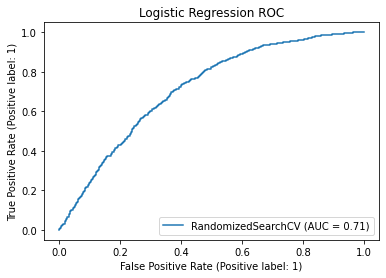

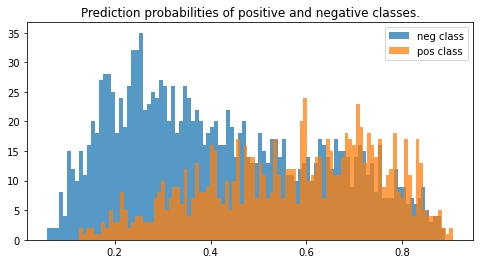







Support Vector (rbf kernel) Classifier Train Set Report
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      7251
           1       0.68      0.78      0.73      7251

    accuracy                           0.71     14502
   macro avg       0.71      0.71      0.71     14502
weighted avg       0.71      0.71      0.71     14502

Support Vector (rbf kernel) Classifier Validation Set Report
              precision    recall  f1-score   support

           0       0.79      0.60      0.68      1541
           1       0.52      0.73      0.61       934

    accuracy                           0.65      2475
   macro avg       0.66      0.66      0.64      2475
weighted avg       0.69      0.65      0.65      2475



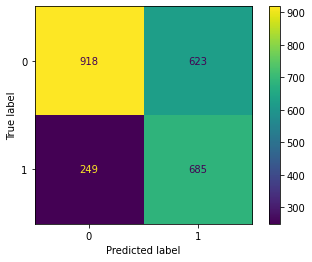

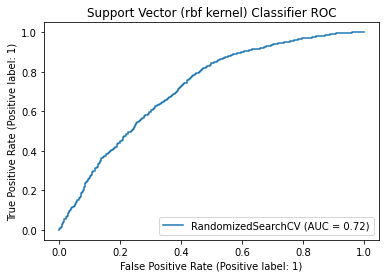







XGB Classifier Train Set Report
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      7251
           1       0.67      0.79      0.72      7251

    accuracy                           0.70     14502
   macro avg       0.71      0.70      0.70     14502
weighted avg       0.71      0.70      0.70     14502

XGB Classifier Validation Set Report
              precision    recall  f1-score   support

           0       0.79      0.59      0.67      1541
           1       0.52      0.75      0.61       934

    accuracy                           0.65      2475
   macro avg       0.66      0.67      0.64      2475
weighted avg       0.69      0.65      0.65      2475



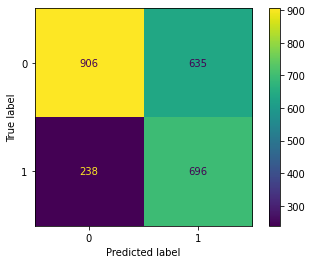

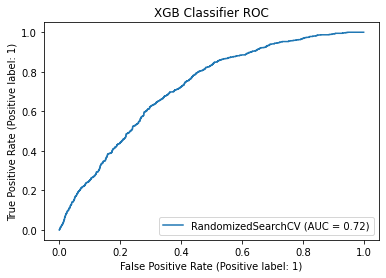

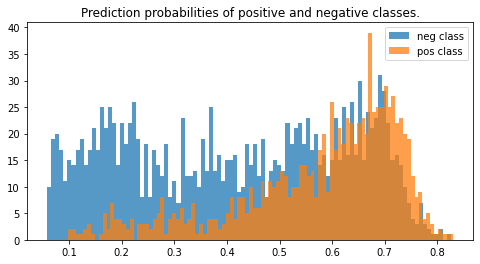

In [7]:

models = {
    'Decision Tree Classifier':{
        'algo': DecisionTreeClassifier(), 
        'n_search':20,
        'grid': {'decisiontreeclassifier__max_depth':list(range(1,30))}
    },
    'Random Forest Classifier':{
        'algo': RandomForestClassifier(), 
        'n_search':20,
        'grid': {'randomforestclassifier__max_depth':list(range(1,20)),
               'randomforestclassifier__n_estimators':list(range(50,250,25))}
    },
    'Gradient Boosting Classifier':{
        'algo': GradientBoostingClassifier(),  
        'n_search':20,
        'grid':  {'gradientboostingclassifier__max_depth': list(range(1,20)), 
               'gradientboostingclassifier__n_estimators': list(range(50,250,25)),
               'gradientboostingclassifier__loss': ['deviance','exponential']}
    },
    'Logistic Regression':{
        'algo': LogisticRegression(), 
        'n_search':20,
        'grid':{'logisticregression__C': loguniform(1e-2 , 1e2) }
    },
    'Support Vector (rbf kernel) Classifier':{
        'algo': SVC(kernel = 'rbf'), 
        'n_search':20,
        'grid': { 'svc__gamma': loguniform(1e-4, 1e0),
               'svc__C': loguniform(1, 1e3)} 
    },
    'XGB Classifier':{
        'algo': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss'),  
        'n_search': 40,
        'grid': {'xgbclassifier__eta': loguniform(1e-2, 1e0), 
              'xgbclassifier__gamma': loguniform(1e-8 , 1e-2),
              'xgbclassifier__lambda': loguniform(1e-2 , 1e1),
              'xgbclassifier__alpha': loguniform(1e-8 , 1e-4),
              'xgbclassifier__max_depth': [3,4,5,6,7,8]} 
    }
}

for name, model in models.items():
    
    algorithm = model['algo']
    n_search = model['n_search']
    grid_params = model['grid'] 
       
    pipeline = make_pipeline( MinMaxScaler(),algorithm )
    
    model_grid = RandomizedSearchCV(pipeline,grid_params, 
                                    cv = 5, n_jobs = 1, 
                                    scoring = score_obj, n_iter=n_search)
    
    model_grid.fit(X_train, y_train)
    model['trained'] = model_grid
    
    print('\n')
    
    HTML('<font size = 7>'+name+'</font>')
    
    y_train_pred = model_grid.predict(X_train)
    print(name, 'Train Set Report')
    print(classification_report(y_train, y_train_pred))
      
    y_valid_pred = model_grid.predict(X_valid)
    print(name, 'Validation Set Report')
    print(classification_report(y_valid, y_valid_pred))
  
    plot_confusion_matrix(model_grid, X_valid, y_valid)
    plt.show()
    
    metrics.plot_roc_curve(model_grid,X_valid,y_valid)
    title = name + ' ROC'
    plt.title(title)
    plt.show()
    
 
    try: 
        w_pred = model_grid.predict_proba(X_valid)[:, 1]
        plt.figure(figsize=(8,4))
        plt.hist(w_pred[np.where(y_valid == 0)], bins=100, alpha=0.75, label='neg class')
        plt.hist(w_pred[np.where(y_valid == 1)], bins=100, alpha=0.75, label='pos class')
        plt.legend()
        plt.title('Prediction probabilities of positive and negative classes.')
        plt.show()
    except:
        pass
         
    model['f1_score'] = f1_score(y_valid,y_valid_pred)
    model['Best Parameters'] = model_grid.best_params_
    
    
    print('\n'*3)
    
    

### Best models by f1 score

In [8]:
f1_dict = {name:models[name]['f1_score'] for name in models}
from collections import Counter
best_models = [x[0] for x in Counter(f1_dict).most_common(3)]
best_models = {x:models[x] for x in best_models}

for name,model in best_models.items():
    print(f'Model: {name}')
    print(f"f1 score: {model['f1_score']}")
    print('Parameters:')
    for parameter, value in model['Best Parameters'].items():
        print(f"{parameter.split('__')[1]}: {value}")
    print('\n'*2)

Model: Random Forest Classifier
f1 score: 0.6191319751992914
Parameters:
n_estimators: 150
max_depth: 10



Model: Gradient Boosting Classifier
f1 score: 0.6148314606741573
Parameters:
n_estimators: 125
max_depth: 3
loss: deviance



Model: XGB Classifier
f1 score: 0.614569536423841
Parameters:
alpha: 4.296406761403352e-07
eta: 0.03889962253765216
gamma: 1.5085492715901875e-06
lambda: 0.021202795635683964
max_depth: 4





### Stacking best models for the best predictor

Stacking Classifier Train Report
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      7251
           1       0.67      0.77      0.72      7251

    accuracy                           0.70     14502
   macro avg       0.70      0.70      0.69     14502
weighted avg       0.70      0.70      0.69     14502

Stacking Classifier Validation Report
              precision    recall  f1-score   support

           0       0.79      0.60      0.68      1541
           1       0.53      0.73      0.61       934

    accuracy                           0.65      2475
   macro avg       0.66      0.67      0.65      2475
weighted avg       0.69      0.65      0.66      2475

The f1 score on the validation set  is 0.6141


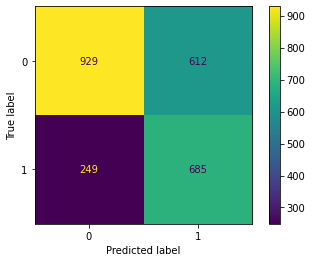

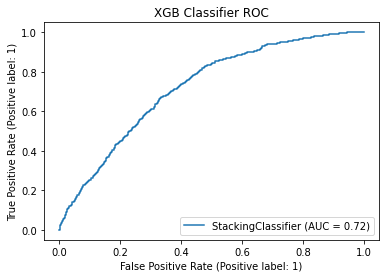

In [9]:
estimators = [
    ('GBC', GradientBoostingClassifier(max_depth = 2, n_estimators = 100,loss='exponential')),
    ('LogReg',make_pipeline( MinMaxScaler(),LogisticRegression(C = .011))),
    ('XGB',XGBClassifier(use_label_encoder=False,eval_metric = 'logloss',
                              alpha = 3.8e-7, eta = 0.044, gamma = 1.9e-3, 
                              reg_lambda = 0.021, max_depth = 3 ))
]
stack = StackingClassifier(estimators=estimators,
                          final_estimator = LogisticRegression())
stack.fit(X_train, y_train)

y_train_pred = stack.predict(X_train)
print('Stacking Classifier Train Report')
print(classification_report(y_train, y_train_pred))
y_valid_pred = stack.predict(X_valid)
print('Stacking Classifier Validation Report')
print(classification_report(y_valid, y_valid_pred))
        
print(f'The f1 score on the validation set  is { f1_score(y_valid,y_valid_pred):.4f}')    
        
plot_confusion_matrix(stack, X_valid, y_valid)
plt.show()
    
metrics.plot_roc_curve(stack,X_valid,y_valid)
title = name + ' ROC'
plt.title(title)
plt.show()

The stacked model does not outperform the random forest model. It is preferrable to use the simpler model.